In [ ]:
import sqlite3
import pandas as pd

In [ ]:
!gdown 1-8YGscYS1JEHYybsg5TimLTcNWWRha-V

Downloading...
From: https://drive.google.com/uc?id=1-8YGscYS1JEHYybsg5TimLTcNWWRha-V
To: /content/lab5_new.db
100% 119k/119k [00:00<00:00, 52.9MB/s]


In [ ]:
conn = sqlite3.connect('lab5_new.db')

Создать форму в Colab, в которой в поле необходимо ввести код покупателя, и с помощью read_sql_query вывести (SELECT) количество покупок из таблицы purchases, которые сделал покупатель с введеннымcustomer_id .

In [ ]:
conn = sqlite3.connect('/content/lab5_new.db')
pd.read_sql_query("""SELECT*
                    FROM purchases
                    ORDER BY customer_id""", conn)

,purchase_id,customer_id,store_id,purchase_date
0,5,1,2,1611613952
1,12,1,3,1609709244
2,14,1,3,1617535345
3,16,1,1,1622155011
4,23,1,3,1611560816
5,24,1,3,1609623562
6,27,1,1,1621013551
7,38,1,1,1620029737
8,39,1,2,1609700051
9,40,1,2,1613730604


In [ ]:
customer_id = input('Please, enter the customer_id: ')
sql = f"""SELECT customer_id AS 'ID покупателя', COUNT(purchase_id) AS 'Количество покупок'
        FROM purchases
        WHERE customer_id = """+customer_id +"""
        GROUP BY customer_id;"""
pd.read_sql_query(sql, conn)

Please, enter the customer_id: 4


,ID покупателя,Количество покупок
0,4,11


Примечание: Есть данные только 5 покупателей, поэтому можно сделать следующее:

In [ ]:
customer_id = "4" #@param ["1", "2",'3', '4', '5']
sql = f"""SELECT customer_id AS 'ID покупателя', COUNT(purchase_id) AS 'Количество покупок'
        FROM purchases
        WHERE customer_id = """+customer_id +"""
        GROUP BY customer_id;"""
pd.read_sql_query(sql, conn)

,ID покупателя,Количество покупок
0,4,11


С помощью read_sql_query выполнить соединение двух таблиц purchases  и customers (INNER JOIN)  и добавить в запрос - имя клиента - вывод количества покупок каждого клиента.

In [ ]:
sql = """
    SELECT purchases.customer_id AS 'ID покупателя', customer_name AS 'ФИО покупателя', COUNT(purchase_id) AS 'Количество покупок'
    FROM purchases
    JOIN customers ON purchases.customer_id = customers.customer_id
    GROUP BY purchases.customer_id, customer_name
"""
df = pd.read_sql_query(sql, conn)
df

,ID покупателя,ФИО покупателя,Количество покупок
0,1,Елена Кузьминична Елисеева,11
1,2,Галкина Жанна Геннадьевна,9
2,3,Мухина Зоя Валентиновна,7
3,4,Мишина Евдокия Ниловна,11
4,5,Олег Иванович Большаков,12


Создать форму с выпадающим списком, в котором будет 2 значения - seaborn и plotly. Выполнить визуализацию данных запроса из задания, либо с помощью seaborn - построить barplot, либо с помощью  plotly.express в зависимости от выбора из выпадающего списка значения.

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px

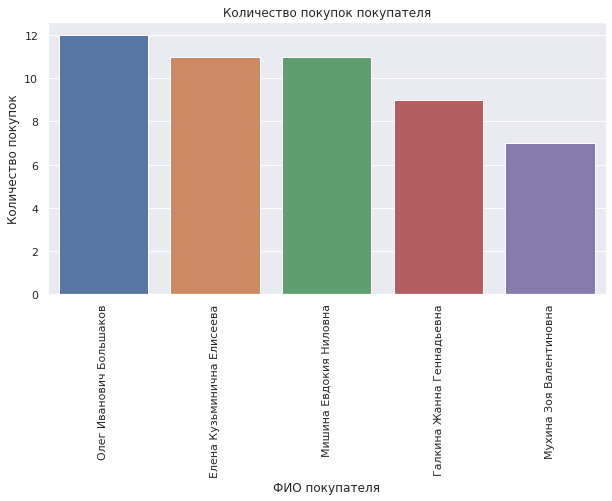

In [ ]:
way_of_visualisation = 'matplotlib' #@param ['matplotlib', 'plotly']
if way_of_visualisation == 'plotly':
  px.bar(df, x='ФИО покупателя', y='Количество покупок', color='ФИО покупателя').show()
elif way_of_visualisation == 'matplotlib':
  sns.set(rc={'figure.figsize':(10,5)})
  ax = sns.barplot(x='ФИО покупателя', y='Количество покупок', data=df)
  ax.set(xlabel='ФИО покупателя', ylabel='Количество покупок',
       title='Количество покупок покупателя')
  plt.xticks(rotation=90)
  plt.show()

Модифицировать запрос из задания 2. Создать новую форму и добавить поле с вводом количества записей, которые будут выведены с помощью LIMIT и добавить поле с выбором типа сортировки (по убыванию или возрастанию). С помощью read_sql_query вывести (SELECT) количество покупок каждого покупателя из таблицы  purchases, вывести имя клиента,  при выводе в зависимости от выбора пользователя выполнять сортировку и отобразить нужное число записей.

In [ ]:
limit = 5 #@param {type:"slider", min:0, max:5, step:1}
type_sort = '\u043F\u043E \u0432\u043E\u0437\u0440\u0430\u0441\u0442\u0430\u043D\u0438\u044E' #@param ['по возрастанию', 'по убыванию']
if type_sort == 'по возрастанию':
  sql = """
      SELECT purchases.customer_id AS 'ID покупателя', customer_name AS 'ФИО покупателя', COUNT(purchase_id) AS 'Количество покупок'
      FROM purchases
      JOIN customers ON purchases.customer_id = customers.customer_id
      GROUP BY purchases.customer_id, customer_name
      ORDER BY COUNT(purchase_id) DESC
      LIMIT """ + str(limit)
elif type_sort == 'по убыванию':
  sql = """
      SELECT purchases.customer_id AS 'ID покупателя', customer_name AS 'ФИО покупателя', COUNT(purchase_id) AS 'Количество покупок'
      FROM purchases
      JOIN customers ON purchases.customer_id = customers.customer_id
      GROUP BY purchases.customer_id, customer_name
      ORDER BY COUNT(purchase_id)
      LIMIT """ + str(limit)
df = pd.read_sql_query(sql, conn)
df

,ID покупателя,ФИО покупателя,Количество покупок
0,5,Олег Иванович Большаков,12
1,1,Елена Кузьминична Елисеева,11
2,4,Мишина Евдокия Ниловна,11
3,2,Галкина Жанна Геннадьевна,9
4,3,Мухина Зоя Валентиновна,7
